# Initial Value Problems for Ordinary Differential Equations, Part 4: Systems of ODEs and Higher Order ODEs

**Last updated on March 31, 2021** (after class, adding the Runge-Kutta, Explicit Trapezoid and Explicit Midpoint method for systems)

The short version of this section is that the numerical methods and algorithms developed so for for the initial value problem

$$
\begin{split}
\frac{d u}{d t} &= f(t, u(t)), \quad a \leq t \leq b
\\
u(a) &= u_0
\end{split}
$$

all also work for system of first order ODEs by simply letting $u$ and $f$ be vector-valued,
and the Python code requires only one very small change.

Also, higher order ODE's (and syrem of them) can be converted into system of first order ODEs.

The second point is seen in a typical first course in differential equations, so I will just illutrate the procedure for a single famous example.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Shortcuts for some favorite commands:
from numpy import linspace

## Motion of a Damped Mass-Spring System in One Dimension

A simple mathematical model of a damped mass-spring system is

$$
\begin{split}
M \frac{d^2 y}{d t^2} &= -k u - D \frac{d y}{d t}
\\
& \text{with initial conditions}
\\
y(a) &= y_0
\\
\left. \frac{dy}{dt} \right|_{t=a} &= v_0
\end{split}
$$

where $k$ is the spring constant and $D$ is the coefficient of friction, or drag.

To convert to a first order system, introduction the two functions

$$
\begin{split}
u_0(t) &= y(t)
\\
u_1(t) &= \frac{d y}{d t}
\end{split}
$$

(Aside: this is one of many places where the Pythonic system of counting from $0$ fits the mathematics better!)

Then with $d^2 y/dt^2 = d u_1/dt$ the above equation becomes

$$
\frac{d u_1}{d t} = -\frac{k}{M} u_0 - \frac{D}{M} u_1
$$

Combined with the definition of $u_1$ give the system

$$
\begin{split}
\frac{d u_0}{d t} &= u_1
\\
\frac{d u_1}{d t} &= -\frac{k}{M} u_0 - \frac{D}{M} u_1
\\
&\text{with initial conditions}
\\
u_0(a) &= y_0
\\
u_1(a) &= v_0
\end{split}
$$

Next this can be put into vector form.
Defining the vector-valued functions

$$
\begin{split}
\tilde{u}(t) &= \langle u_0(t), u_1(t) \rangle
\\
\tilde{f}(t, \tilde{u}(t)) &= \left\langle u_1(t), -\frac{k}{M} u_0(t) - \frac{D}{M} u_1(t) \right\rangle
\end{split}
$$

and initial data vector

$$\tilde{u}_0 = \langle u_{0,0}, u_{0,1} \rangle = \langle y_0, v_0 \rangle$$

puts the ODE IVP into the form

$$
\begin{split}
\frac{d \tilde{u}}{d t} &= \tilde{f}(t, \tilde{u}(t)), \quad a \leq t \leq b
\\
\tilde{u}(a) &= \tilde{u}_0
\end{split}
$$

The Euler's method code from before:

In [2]:
def euler(f, a, b, u_0, n=100):
    """Use Euler's Method to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    U = np.empty_like(t)
    U[0] = u_0
    for i in range(n):
        U[i+1] = U[i] + f(t[i], U[i])*h
    return (t, U)

does not quite work, but only slgiht modificsit is needed: 

In [3]:
def euler_system(f, a, b, u_0, n=100):
    """Use Euler's Method to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0
    Modified from function euler to handle systems."""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    
    # Only the following three lines change for the systems version
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        U[i+1] = U[i] + f(t[i], U[i])*h
    return (t, U)

In [4]:
def f(t, u):
    return np.array([ u[1], -(k/M)*u[0] - (D/M)*u[1]])

In [5]:
M = 1.0
k = 1.0
D = 0.0
u_0 = [1.0, 0.0]
a = 0.0
b = 8 * np.pi # Four periods

In [6]:
n=400
(t, U) = euler_system(f, a, b, u_0, n)
y = U[:,0]
Dy = U[:,1]

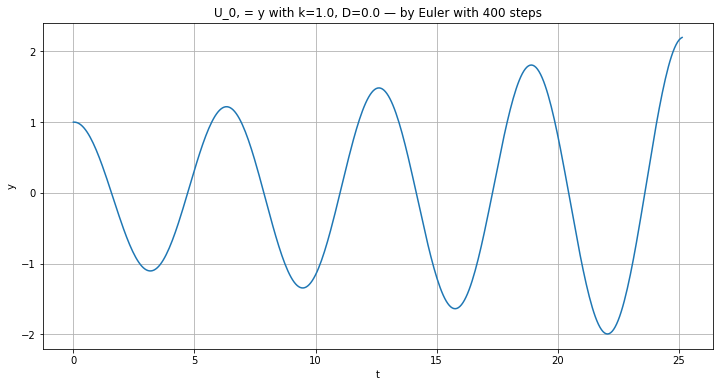

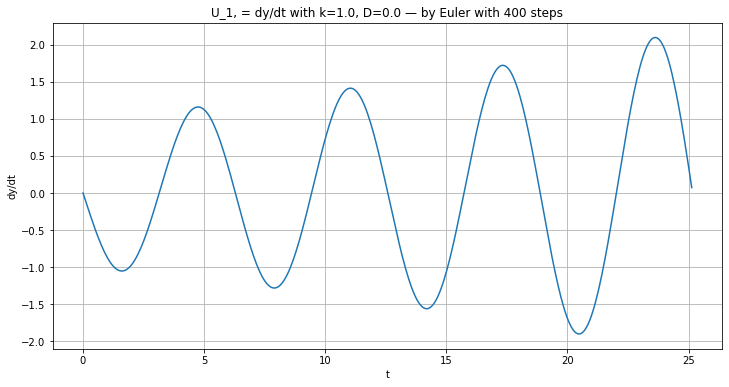

In [7]:
plt.figure(figsize=[12,6])
plt.title(f"U_0, = y with {k=}, {D=} — by Euler with {n} steps")
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

plt.figure(figsize=[12,6])
plt.title(f"U_1, = dy/dt with {k=}, {D=} — by Euler with {n} steps")
plt.plot(t, Dy)
plt.xlabel('t')
plt.ylabel('dy/dt')
plt.grid(True)

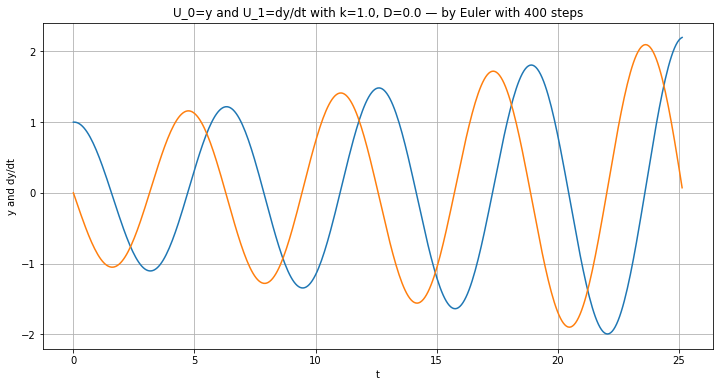

In [8]:
plt.figure(figsize=[12,6])
plt.title(f"U_0=y and U_1=dy/dt with {k=}, {D=} — by Euler with {n} steps")
plt.plot(t, U)
plt.xlabel('t')
plt.ylabel('y and dy/dt')
plt.grid(True)

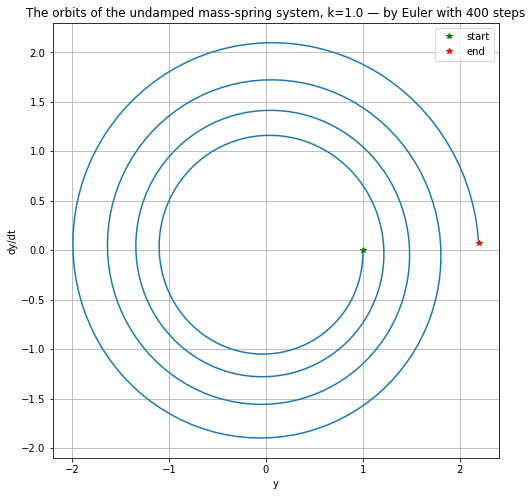

In [9]:
plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
if D == 0.:
    plt.title(f"The orbits of the undamped mass-spring system, {k=} — by Euler with {n} steps")
else:
    plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by Euler with {n} steps")
plt.plot(y, Dy)
plt.xlabel('y')
plt.ylabel('dy/dt')
plt.plot(y[0], Dy[0], "g*", label="start")
plt.plot(y[-1], Dy[-1], "r*", label="end")
plt.legend()
plt.grid(True)

## The "Classical" Runge-Kutta Method, Extended to Systems of Equations

As above, the previous function for this method needs just three lines of code modified.

Before:

In [10]:
def RungeKutta(f, a, b, u_0, n=100):
    """Use the (classical) Runge-Kutta Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    U = np.empty_like(t)
    U[0] = u_0
    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h/2, U[i]+K_1/2)*h
        K_3 = f(t[i]+h/2, U[i]+K_2/2)*h
        K_4 = f(t[i]+h, U[i]+K_3)*h
        U[i+1] = U[i] + (K_1 + 2*K_2 + 2*K_3 + K_4)/6
    return (t, U)

After:

In [11]:
def RungeKutta_system(f, a, b, u_0, n=100):
    """Use the (classical) Runge-Kutta Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following three lines change for the systems version — the same lines as for euler_system and so on.
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h/2, U[i]+K_1/2)*h
        K_3 = f(t[i]+h/2, U[i]+K_2/2)*h
        K_4 = f(t[i]+h, U[i]+K_3)*h
        U[i+1] = U[i] + (K_1 + 2*K_2 + 2*K_3 + K_4)/6
    return (t, U)

In [12]:
M = 1.0
k = 1.0
D = 0.0
u_0 = [1.0, 0.0]
a = 0.0
b = 8 * np.pi # Four periods

In [13]:
n_RK = 100
n = n_RK

In [14]:
(t, U) = RungeKutta_system(f, a, b, u_0, n)
y = U[:,0]
Dy = U[:,1]

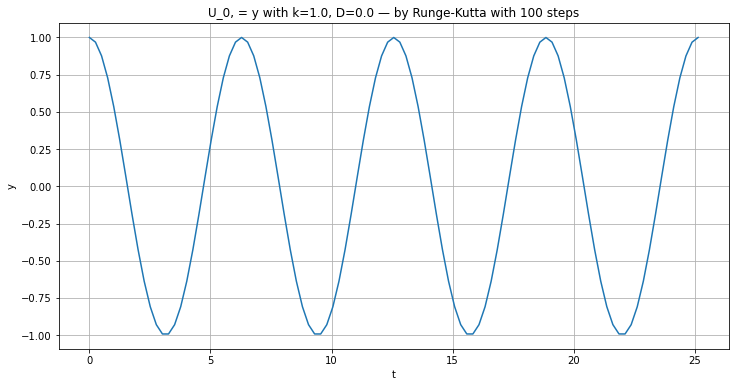

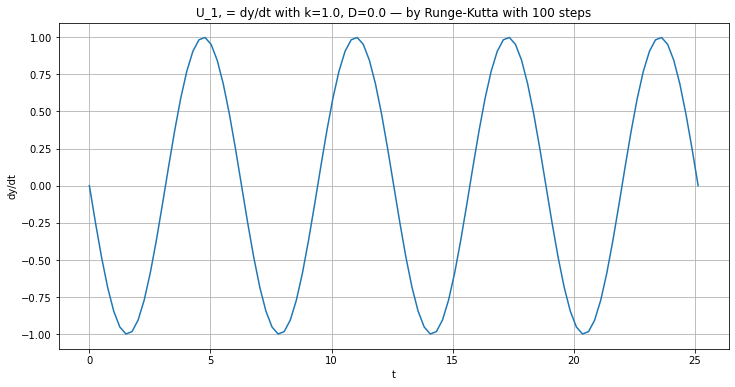

In [15]:
plt.figure(figsize=[12,6])
plt.title(f"U_0, = y with {k=}, {D=} — by Runge-Kutta with {n} steps")
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

plt.figure(figsize=[12,6])
plt.title(f"U_1, = dy/dt with {k=}, {D=} — by Runge-Kutta with {n} steps")
plt.plot(t, Dy)
plt.xlabel('t')
plt.ylabel('dy/dt')
plt.grid(True)

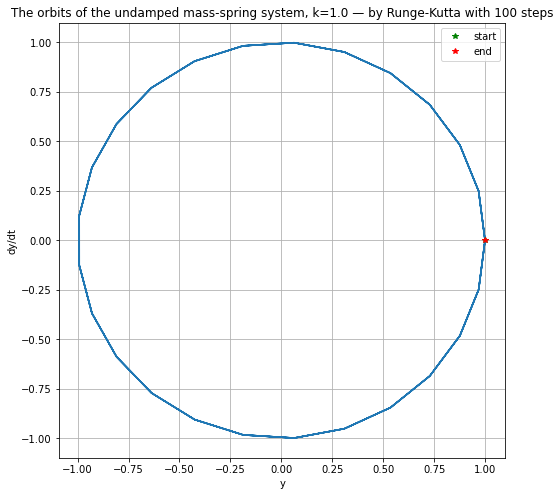

In [16]:
plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
if D == 0.:
    plt.title(f"The orbits of the undamped mass-spring system, {k=} — by Runge-Kutta with {n} steps")
else:
    plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by Runge-Kutta with {n} steps")
plt.plot(y, Dy)
plt.xlabel('y')
plt.ylabel('dy/dt')
plt.plot(y[0], Dy[0], "g*", label="start")
plt.plot(y[-1], Dy[-1], "r*", label="end")
plt.legend()
plt.grid(True)

## Appendix: the Explicit Trapezoid and Midpoint Methods for systems

Yet again, the previous functions for these methods need just three lines of code modified.

The demos are just for the non-dissipative case, where the solution is known to be $y = \cos t$, $dt/dt = -\sin t$.

For a fairer comparison of "accuracy vs computtional effort" to the Runge-Kutta method,
twice as many time steps are used so that the same number of function evaluations are used for these three methods.

In [17]:
def explicitTrapezoid_system(f, a, b, u_0, n=100):
    """Use the Explict Trapezoid Method (a.k.a Improved Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following three lines change for the systems version — the same lines as for euler_system and so on.
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h, U[i]+K_1)*h
        U[i+1] = U[i] + (K_1 + K_2)/2.
    return (t, U)

In [18]:
M = 1.0
k = 1.0
D = 0.0
u_0 = [1.0, 0.0]
a = 0.0
b = 8 * np.pi # Four periods

In [19]:
n = n_RK * 2

In [20]:
(t, U) = explicitTrapezoid_system(f, a, b, u_0, n)
y = U[:,0]
Dy = U[:,1]

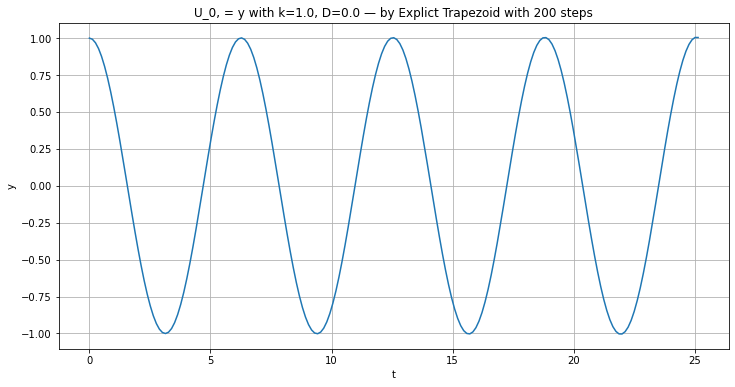

In [21]:
plt.figure(figsize=[12,6])
plt.title(f"U_0, = y with {k=}, {D=} — by Explict Trapezoid with {n} steps")
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

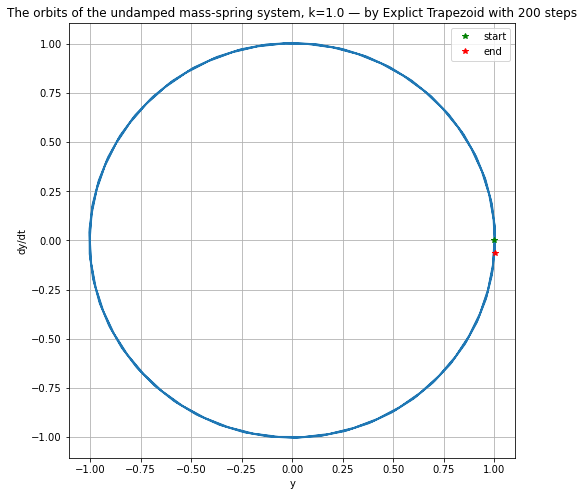

In [22]:
plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
if D == 0.:
    plt.title(f"The orbits of the undamped mass-spring system, {k=} — by Explict Trapezoid with {n} steps")
else:
    plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by Explict Trapezoid with {n} steps")
plt.plot(y, Dy)
plt.xlabel('y')
plt.ylabel('dy/dt')
plt.plot(y[0], Dy[0], "g*", label="start")
plt.plot(y[-1], Dy[-1], "r*", label="end")
plt.legend()
plt.grid(True)

In [23]:
def explicitMidpoint_system(f, a, b, u_0, n=100):
    """Use the Explicit Midpoint Method (a.k.a Modified Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.

    # Only the following three lines change for the systems version — the same lines as for euler_system and so on.
    n_unknowns = len(u_0)
    U = np.zeros([n+1, n_unknowns])
    U[0] = np.array(u_0)

    for i in range(n):
        K_1 = f(t[i], U[i])*h
        K_2 = f(t[i]+h/2, U[i]+K_1/2)*h
        U[i+1] = U[i] + K_2
    return (t, U)

In [24]:
M = 1.0
k = 1.0
D = 0.0
u_0 = [1.0, 0.0]
a = 0.0
b = 8 * np.pi # Four periods

In [25]:
n = n_RK * 2

In [26]:
(t, U) = explicitMidpoint_system(f, a, b, u_0, n)
y = U[:,0]
Dy = U[:,1]

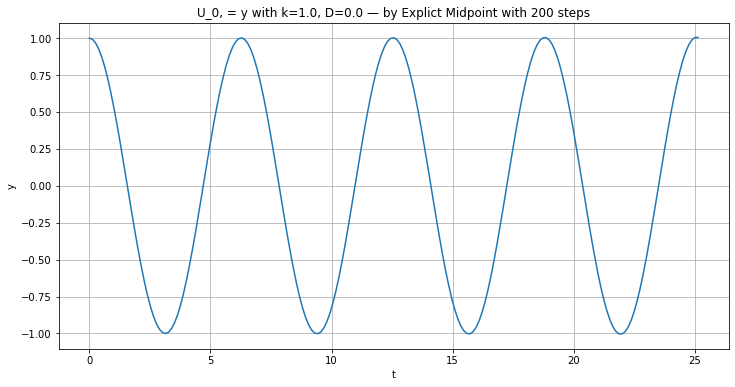

In [27]:
plt.figure(figsize=[12,6])
plt.title(f"U_0, = y with {k=}, {D=} — by Explict Midpoint with {n} steps")
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

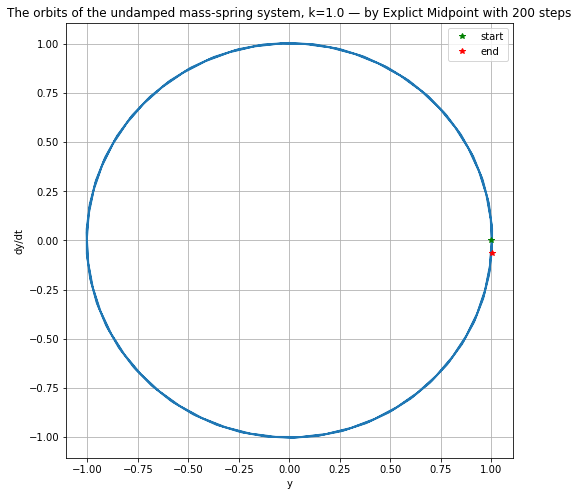

In [28]:
plt.figure(figsize=[8,8])  # Make axes equal length; orbits should be circular or "circular spirals" 
if D == 0.:
    plt.title(f"The orbits of the undamped mass-spring system, {k=} — by Explict Midpoint with {n} steps")
else:
    plt.title(f"The orbits of the damped mass-spring system, k={k}, D={D} — by Explict Midpoint with {n} steps")
plt.plot(y, Dy)
plt.xlabel('y')
plt.ylabel('dy/dt')
plt.plot(y[0], Dy[0], "g*", label="start")
plt.plot(y[-1], Dy[-1], "r*", label="end")
plt.legend()
plt.grid(True)

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)